# Predicting Sales Using Credit Card Spending Patterns


---


---

# 📊 **Table of Contents**
1. [Week 1: Data Loading, Exploration, and Basic Setup](#week-1)
2. [Week 2: Data Cleaning and Exploratory Data Analysis (EDA)](#week-2)
3. [Week 3: Feature Engineering, Model Training, and Evaluation](#week-3)
4. [Week 4: Model Selection, Baseline, and Hyperparameter Tuning](#week-4)
5. [Week 5: Model Evaluation, Comparison, and Documentation](#week-5)

### 🗂️ **Week 1: Data Loading, Exploration, and Basic Setup** <a name="week-1"></a>

####📥 Step 1: Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ModuleNotFoundError: No module named 'pandas'

#### 📊 Step 2: Load the Dataset

In [2]:
file_path = "C:\Users\tharu\Downloads\credit_card_transactions.csv~" # Ensure this file is in the same directory
data = pd.read_csv(file_path)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3274873598.py, line 1)

#### 🔍 Step 3: Display Basic Dataset Information

In [ ]:
print("Dataset Info:")
data.info()

print("\nDataset Preview:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long

#### ❓ Step 4: Check for Missing Values

In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64


###🧹 **Week 2: Data Cleaning and Exploratory Data Analysis (EDA)** <a name="week-2"></a>

#### 🚿 Step 5: Data Cleaning

In [ ]:
# Rename date column for consistency
data.rename(columns={'trans_date_trans_time': 'Transaction Date'}, inplace=True)

# Convert 'Transaction Date' to datetime format
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'], errors='coerce')

# Drop columns not useful for sales prediction
columns_to_drop = ['Unnamed: 0', 'cc_num', 'first', 'last', 'gender', 'street', 'city',
                   'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num',
                   'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode', 'Transaction Date']
data_cleaned = data.drop(columns=columns_to_drop)

# Remove rows with missing values
data_cleaned.dropna(inplace=True)

#### 📈 Step 6: Exploratory Data Analysis (EDA)

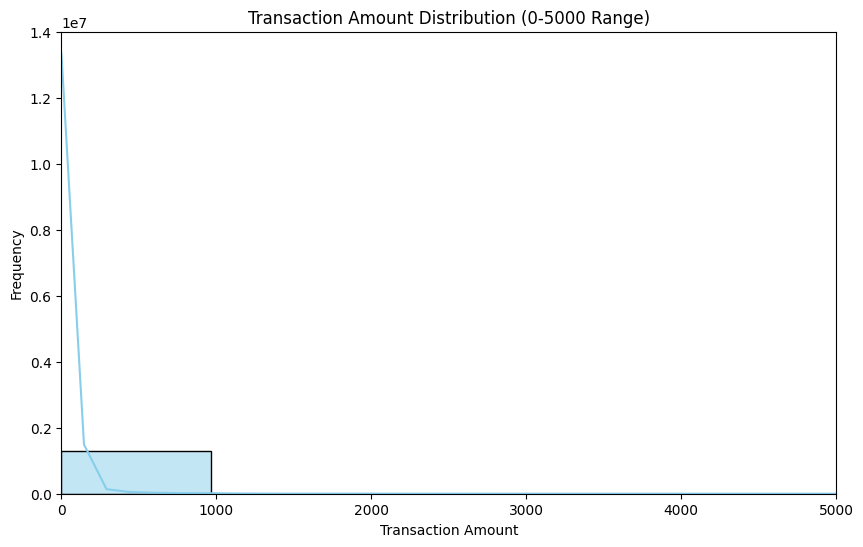


Spending by Category (Transactions ≤ 5000):
category
grocery_pos       14460822.38
shopping_pos       9214018.71
shopping_net       8527132.22
gas_transport      8351732.29
home               7173928.11
kids_pets          6503680.16
entertainment      6036678.56
misc_net           5117709.26
misc_pos           5009582.50
food_dining        4672459.44
health_fitness     4653108.02
personal_care      4353450.53
travel             3500241.47
grocery_net        2439412.68
Name: amt, dtype: float64


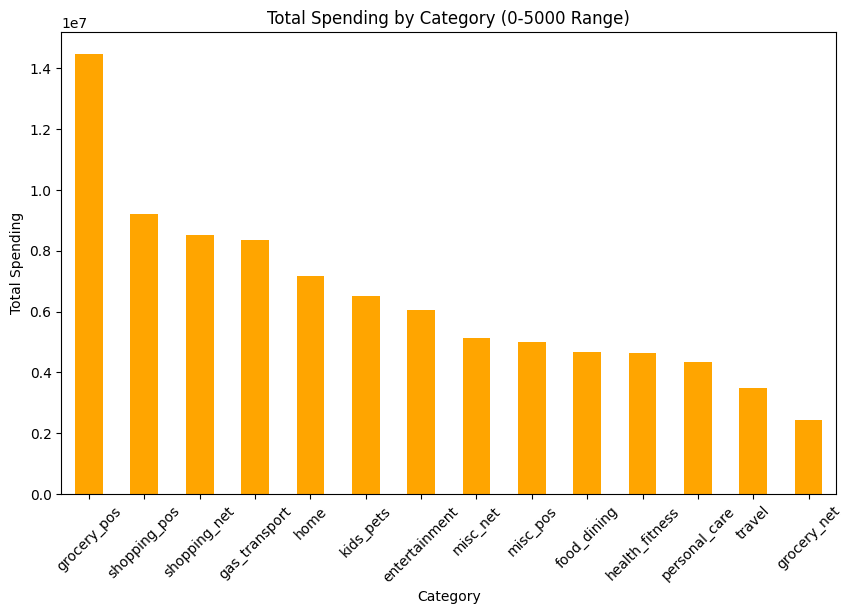

In [ ]:
### 📊 Transaction Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['amt'], bins=30, kde=True, color='skyblue')
plt.title("Transaction Amount Distribution (0-5000 Range)")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.xlim(0, 5000)  # Setting range for more detailed visualization
plt.show()

### 📊 Spending by Category (Filtered for Transactions ≤ 5000)
category_spending_filtered = data[data['amt'] <= 5000].groupby('category')['amt'].sum().sort_values(ascending=False)
print("\nSpending by Category (Transactions ≤ 5000):")
print(category_spending_filtered)

plt.figure(figsize=(10, 6))
category_spending_filtered.plot(kind='bar', color='orange')
plt.title("Total Spending by Category (0-5000 Range)")
plt.xlabel("Category")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)  # Rotate category labels for better readability
plt.show()

### 🚀 **Week 3: Feature Engineering, Model Training, and Evaluation** <a name="week-3"></a>


#### ⚙️ Step 7: Feature Engineering

In [ ]:
# Convert categorical columns to numerical using One-Hot Encoding
data_cleaned = pd.get_dummies(data_cleaned, columns=['merchant', 'category'], drop_first=True)

NameError: name 'pd' is not defined

#### 🎯 Step 8: Define Target Variable and Features

In [ ]:
X = data_cleaned.drop(columns=['amt'])  # Features (only numerical values)
y = data_cleaned['amt']  # Target variable (Transaction Amount)

#### 🔀 Step 9: Split Data into Training & Testing Sets (80% Train, 20% Test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 🤖 Step 10: Train Random Forest Model

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

NameError: name 'RandomForestRegressor' is not defined

#### 📊 Step 11: Make Predictions

In [ ]:
y_pred = rf_model.predict(X_test)

#### 📝 Step 12: Evaluate the Model

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


###Week 4: Model Selection, Baseline, and Hyperparameter Tuning**

####**Step 13: Save the Final Model and Results**




In [ ]:
# Import necessary libraries
import joblib
import pandas as pd

# Ensure the best trained model exists (Run hyperparameter tuning if needed)
if 'best_rf' not in locals():
    print("Error: 'best_rf' model not found. Make sure you have trained and tuned the model before saving.")
else:
    # Save the trained final model
    joblib.dump(best_rf, 'final_random_forest_model.joblib')
    print("Final Random Forest model saved as 'final_random_forest_model.joblib'")

# Ensure predictions exist before saving them
if 'y_pred_final' not in locals() or 'y_test' not in locals():
    print("Error: Predictions not found. Make sure you have made predictions before saving.")
else:
    # Save predictions for further analysis
    predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_final})
    predictions_df.to_csv('model_predictions.csv', index=False)
    print("Predictions saved to 'model_predictions.csv'")


####🛠️ **Step 14: Hyperparameter Tuning with Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='r2',
                           verbose=2)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

####📊 **Step 15: Feature Importance Analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = grid_search.best_estimator_.feature_importances_
features = X.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=features, palette='magma')
plt.title('Feature Importance from Tuned Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


##🚀 **Week 5: Model Evaluation, Comparison, and Documentation**

#### 📊 **Step 17: Cross-Validation for Model Evaluation**

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='r2')
print("Mean CV R² Score:", cv_scores.mean())

#### 🆚 **Step 18: Model Comparison**

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_r2 = lr_model.score(X_test, y_test)
rf_r2 = r2_score(y_test, grid_search.best_estimator_.predict(X_test))
print("Linear Regression R² Score:", lr_r2)
print("Random Forest R² Score:", rf_r2)

#### 📝 **Step 19: Project Report Generation**

In [ ]:
report = f"""
**Model Comparison:**
- Linear Regression R² Score: {lr_r2:.4f}
- Random Forest R² Score: {rf_r2:.4f}
**Cross-Validation:**
- Mean CV R² Score: {cv_scores.mean():.4f}
"""
with open('model_evaluation_report.txt', 'w') as file:
    file.write(report)
print("Model evaluation report saved as 'model_evaluation_report.txt'")

### 🚀 **Week 6: Deployment and API Integration**


#### 🌐 **Step 20: Deploying the Model with Flask API**

In [ ]:
```python
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

# Load trained model
model = joblib.load('final_random_forest_model.joblib')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    df = pd.DataFrame(data)
    prediction = model.predict(df)
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)

#### 🚀 **Step 21: Testing the API**

In [ ]:
python
import requests

url = 'http://127.0.0.1:5000/predict'
data = {'feature1': [value1], 'feature2': [value2]}  # Replace with actual features
response = requests.post(url, json=data)
print(response.json())

### 🚀 **Week 7: Performance Monitoring and Future Improvements**

#### 📈 **Step 22: Monitoring Model Performance**

In [ ]:
python
import mlflow
mlflow.set_experiment("Credit Card Sales Prediction")

with mlflow.start_run():
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 20)
    mlflow.log_metric("r2_score", rf_r2)
    mlflow.sklearn.log_model(rf_model, "random_forest_model")

#### 🔄 **Step 23: Continuous Model Retraining**

In [ ]:
python
from apscheduler.schedulers.background import BackgroundScheduler

def retrain_model():
    # Reload data, train new model, and save
    new_data = pd.read_csv("new_credit_card_transactions.csv")
    new_X = new_data.drop(columns=['amt'])
    new_y = new_data['amt']
    new_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    new_rf_model.fit(new_X, new_y)
    joblib.dump(new_rf_model, 'final_random_forest_model.joblib')
    print("Model retrained and updated!")

scheduler = BackgroundScheduler()
scheduler.add_job(retrain_model, 'interval', weeks=1)  # Retrain weekly
scheduler.start()

#### 📝 **Step 24: Future Improvements**

In [ ]:
- **Enhance Feature Engineering:** Use time-series analysis for seasonal trends.
- **Optimize Hyperparameters Further:** Experiment with Bayesian Optimization.
- **Use More Advanced Models:** Try XGBoost or Deep Learning for improved accuracy.
- **Deploy on Cloud:** Host the API on AWS/GCP for scalability.